In [1]:
import numpy as np
import pandas as pd
from utils import Utils
from skimage.transform import resize, rotate, rescale
from skimage import io
from skimage.exposure import adjust_gamma
from skimage.color import rgb2gray
from haar_like_features import HaarLikeFeatures
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
utils = Utils()

In [3]:
non_faces = utils.load_pickle('../dataset/pkls/train/non_faces.pkl')

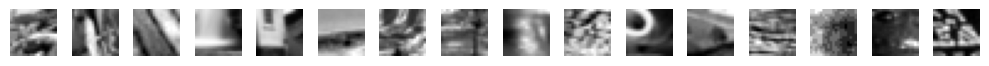

In [4]:
utils.display_random_images(non_faces, 16)

In [5]:
haar = HaarLikeFeatures()

## Here I try to augment DATASET


In [6]:
# Example augmentation functions
def random_rotation(image):
    angle = np.random.uniform(-30, 30)
    return rotate(image, angle)

def random_flip(image):
    if np.random.rand() < 0.5:
        return np.fliplr(image)
    else:
        return image

def adjust_contrast(image):
    """
    For gamma greater than 1, the histogram will shift towards left and the output image will be darker than the input image.

    For gamma less than 1, the histogram will shift towards right and the output image will be brighter than the input image.
    """
    return adjust_gamma(image, gamma=np.random.uniform(0.5, 1.5))


In [21]:
non_faces.shape

(4548, 19, 19)

In [7]:
random_rotated_faces = [random_rotation(img) for img in non_faces]
random_rotated_faces1 = [random_rotation(img) for img in non_faces]

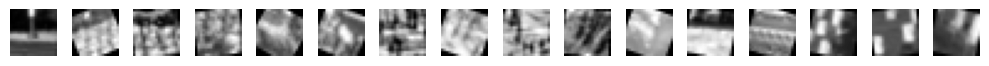

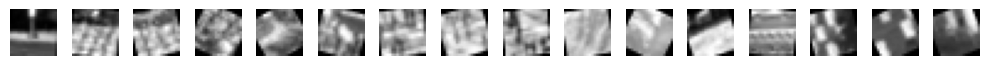

In [8]:
utils.display_images(random_rotated_faces, 16)
utils.display_images(random_rotated_faces1, 16)


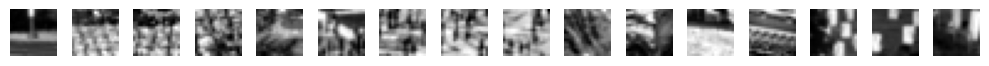

In [9]:
random_flipped_faces = [random_flip(img) for img in non_faces]
random_flipped_faces1 = [random_flip(img) for img in non_faces]
utils.display_images(random_flipped_faces, 16)

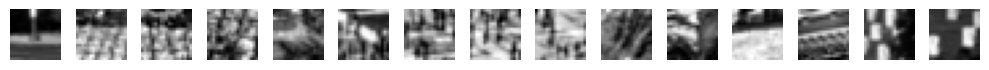

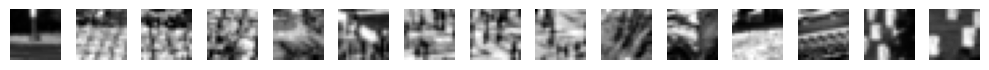

In [10]:
random_gamma_faces = [adjust_contrast(img) for img in non_faces]
utils.display_images(non_faces, 15)
utils.display_images(random_gamma_faces, 15)

## Start Augmentation


In [22]:
get_aug_img = lambda img: random_flip(random_rotation(adjust_contrast(img)))

In [23]:
ds = [get_aug_img(img) for img in non_faces]

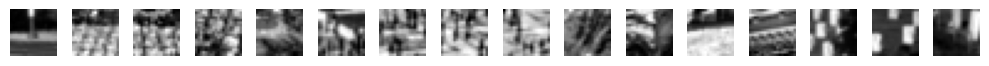

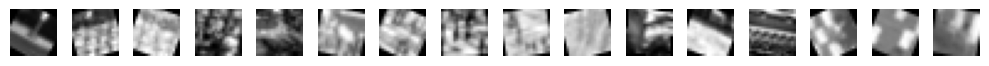

In [24]:
utils.display_images(non_faces, 16)
utils.display_images(ds, 16)

In [26]:
non_faces_aug = np.concatenate([non_faces, ds])

In [27]:
non_faces_aug.shape

(9096, 19, 19)

In [28]:
non_faces_features = utils.apply_func_parallel_nump_array(haar.extract_features, non_faces_aug, 8, 0, 0, 19, 19)


Start parallel processing
Parallel processing finished in 237.1153838634491 seconds


In [29]:
utils.save_pickle(non_faces_features, 'non_faces_features1.pkl')

In [30]:
utils.save_pickle(non_faces_aug, 'non_faces_aug1.pkl')

In [31]:
print(non_faces_aug.shape)

(9096, 19, 19)


In [32]:
print(non_faces_features.shape)

(9096, 6066)
